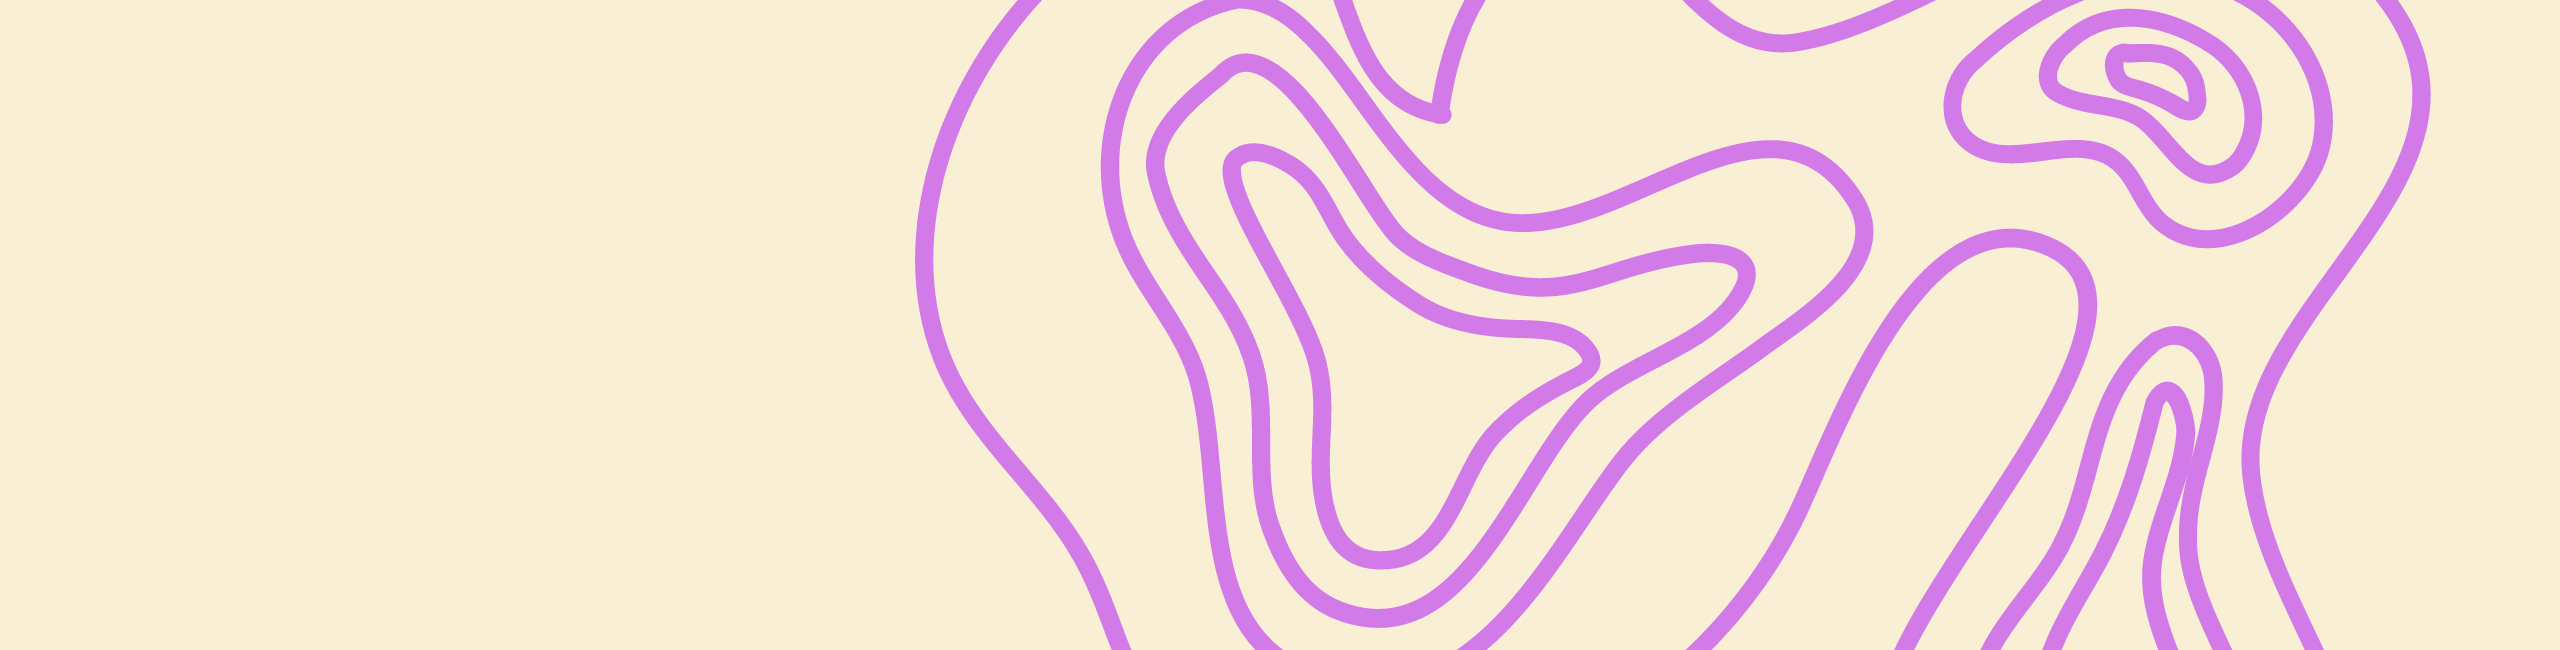

In [149]:
from IPython.display import Image
Image(filename='banner_parsing.png') 

# Explore your favourite novel with Python | 35 minutes | Part I: Preprocessing

## Step 1: Import Libraries & Download NLTK package

In [150]:
from urllib import request # to open urls  
from nltk import pos_tag, RegexpParser # to help mark up words for what part of speech they are in context 
from nltk.corpus import stopwords, wordnet # to get rid of filler words
from nltk.stem import WordNetLemmatizer # to reduce words to their root forms 
from nltk.tokenize import RegexpTokenizer # to chop up text into little bits 
import nltk
from collections import Counter
# python.exe -m pip install --upgrade pip

In [151]:
# nltk.download() 

## Step 2: Read in your favourite Gutenberg book 

In [152]:
# construct the download url = for your Gutenberg title, place 5200 with your book's ID number
url = 'https://www.gutenberg.org/files/5200/5200-0.txt'

In [153]:
response = request.urlopen(url)
print(response)

In [154]:
raw = response.read().decode('utf8')
print(raw)

The Project Gutenberg eBook of Metamorphosis, by Franz Kafka

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **

Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: May 13, 2002 [eBook #5200]
[Most recently updated: May 20, 2012]

Language: English

Character set encoding: UTF-8

Copyright (C) 2002 by David Wyllie.

*** START OF THE PROJECT GUTENBERG EBOOK METAMORPHOSIS ***




Metamorphosis

by Franz Kafka

Translated by David Wyllie




In [155]:
type(raw)

str

## Step 3: Normalise text (all lower case) 

In [156]:
normalised = raw.lower()
print(normalised[1050:1500])


one morning, when gregor samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin. he lay on his
armour-like back, and if he lifted his head a little he could see his
brown belly, slightly domed and divided by arches into stiff sections.
the bedding was hardly able to cover it and seemed ready to slide off
any moment. his many legs, pitifully thin compared with the size of the
rest of him, waved abou


## Step 3: Tokenisation & Noise Removal in One Fell Swoop

- there are many ways to skin a cat - FUN! 

> you can use a regular expression on its own, inbuilt Python or you can use an NLTK tokeniser that tokenises *and* removes any character that is not a word at the same time. 
<br>
> I like BOGOF so I went with the package deal. 

In [157]:
tokeniser = RegexpTokenizer(r'\w+') # instantiates a tokeniser combined with a regular expression which selects only words
tokenised = tokeniser.tokenize(normalised)
print(tokenised)

['the', 'project', 'gutenberg', 'ebook', 'of', 'metamorphosis', 'by', 'franz', 'kafka', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'united', 'states', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www', 'gutenberg', 'org', 'if', 'you', 'are', 'not', 'located', 'in', 'the', 'united', 'states', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'ebook', 'this', 'is', 'a', 'copyrighted', 'project', 'gutenberg', 'ebook', 'details', 'below', 'please', 'follow', 'the', 'copyright', 'guidelines', 'in', 'this', 'file', 'title', 'metamorphosis', 'author', 'franz', 'kafka', 't

## Step 4: Remove stopwords 

In [158]:
stopwords = set(stopwords.words('english')) # defines and grabs English filler words 
print(stopwords)

{'herself', 'i', 'am', 'other', 'him', 'some', 'shan', 'mustn', 'up', 'being', 'few', 'again', 'these', 'mightn', 're', "weren't", 'there', 'no', 'or', 'through', 'whom', "isn't", 'himself', 'same', 'those', 'does', 'me', 'couldn', 'because', 'any', 'having', 'it', 'over', 'down', 'wasn', 'needn', 'do', 'as', 'not', 'but', 'about', 'below', 'between', 'into', 'd', 'our', 'for', 'such', 'm', 'on', 'have', "wouldn't", "hadn't", 'was', 'theirs', 'hers', 'from', "haven't", 'most', 'wouldn', 'yourselves', 'did', 'how', 'why', 'were', 's', "needn't", 'he', "should've", "it's", 'very', 'while', 'nor', 'so', 'ours', 'all', 'should', 'what', "she's", 'the', 'her', 'in', 'she', 'yourself', 'each', 'then', 'an', 'ourselves', 'under', "you're", 'ma', 'shouldn', 'won', 'after', 'by', 'isn', 'more', 'are', 'at', 'itself', 'you', "shouldn't", 'with', 'above', 'o', 'yours', 'this', 'ain', "mightn't", 'y', 'a', 'can', 'once', 'my', 'them', 'further', "shan't", 'has', 'their', 'is', 'out', 'didn', 'they

In [159]:
nostopwords = [word for word in tokenised if word not in stopwords] 
print(nostopwords)

['project', 'gutenberg', 'ebook', 'metamorphosis', 'franz', 'kafka', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www', 'gutenberg', 'org', 'located', 'united', 'states', 'check', 'laws', 'country', 'located', 'using', 'ebook', 'copyrighted', 'project', 'gutenberg', 'ebook', 'details', 'please', 'follow', 'copyright', 'guidelines', 'file', 'title', 'metamorphosis', 'author', 'franz', 'kafka', 'translator', 'david', 'wyllie', 'release', 'date', 'may', '13', '2002', 'ebook', '5200', 'recently', 'updated', 'may', '20', '2012', 'language', 'english', 'character', 'set', 'encoding', 'utf', '8', 'copyright', 'c', '2002', 'david', 'wyllie', 'start', 'project', 'gutenberg', 'ebook', 'metamorphosis', 'metamorphosis', 'franz', 'kafka', 'translated', 'david', 'wyllie', 'one', 'morning', 'gregor', 'samsa', '

# Step 5: Lemmatise 

Lemmatization converts the word to its meaningful base form, which is called Lemma. 


In [160]:
lemmatiser = WordNetLemmatizer()
print(type(lemmatiser))

<class 'nltk.stem.wordnet.WordNetLemmatizer'>


In [161]:
lemmatise_churches = lemmatiser.lemmatize('churches')
print(lemmatise_churches)

church


In [162]:
lemmatised = [lemmatiser.lemmatize(token) for token in nostopwords]
print(lemmatised)

['project', 'gutenberg', 'ebook', 'metamorphosis', 'franz', 'kafka', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'state', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'term', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www', 'gutenberg', 'org', 'located', 'united', 'state', 'check', 'law', 'country', 'located', 'using', 'ebook', 'copyrighted', 'project', 'gutenberg', 'ebook', 'detail', 'please', 'follow', 'copyright', 'guideline', 'file', 'title', 'metamorphosis', 'author', 'franz', 'kafka', 'translator', 'david', 'wyllie', 'release', 'date', 'may', '13', '2002', 'ebook', '5200', 'recently', 'updated', 'may', '20', '2012', 'language', 'english', 'character', 'set', 'encoding', 'utf', '8', 'copyright', 'c', '2002', 'david', 'wyllie', 'start', 'project', 'gutenberg', 'ebook', 'metamorphosis', 'metamorphosis', 'franz', 'kafka', 'translated', 'david', 'wyllie', 'one', 'morning', 'gregor', 'samsa', 'woke', '

## Step 6: Parsing Prep - POS tagging

In [163]:
pos_tagged_text = []
pos_tagged_text.append(pos_tag(lemmatised))
print(pos_tagged_text)

[[('project', 'NN'), ('gutenberg', 'NN'), ('ebook', 'NN'), ('metamorphosis', 'NN'), ('franz', 'NN'), ('kafka', 'NN'), ('ebook', 'NN'), ('use', 'NN'), ('anyone', 'NN'), ('anywhere', 'RB'), ('united', 'JJ'), ('state', 'NN'), ('part', 'NN'), ('world', 'NN'), ('cost', 'NN'), ('almost', 'RB'), ('restriction', 'NN'), ('whatsoever', 'NN'), ('may', 'MD'), ('copy', 'VB'), ('give', 'VB'), ('away', 'RP'), ('use', 'JJ'), ('term', 'NN'), ('project', 'NN'), ('gutenberg', 'NN'), ('license', 'NN'), ('included', 'VBD'), ('ebook', 'JJ'), ('online', 'NN'), ('www', 'NN'), ('gutenberg', 'NN'), ('org', 'NN'), ('located', 'VBN'), ('united', 'JJ'), ('state', 'NN'), ('check', 'NN'), ('law', 'NN'), ('country', 'NN'), ('located', 'VBD'), ('using', 'VBG'), ('ebook', 'NN'), ('copyrighted', 'VBN'), ('project', 'NN'), ('gutenberg', 'NN'), ('ebook', 'NN'), ('detail', 'NN'), ('please', 'NN'), ('follow', 'VB'), ('copyright', 'JJ'), ('guideline', 'NN'), ('file', 'NN'), ('title', 'NN'), ('metamorphosis', 'NN'), ('author'

Some resources note that at this point, you could try compiling/searching/matching specific expressions. In my case, I am keeping my exploration open through chunking - no filtering ('chinking') because I do not know yet what I am looking for but you could be specific, eg by including specific character names or certain places. 

## Step 7: Parsing & Chunking

In [164]:
# personally, I am interested in the actions of the characters, so I selected a verb phrase pattern 
# before moving on to nouns and noun phrases:
# chunk_grammar = "My Phrase: {<VB.><DT>?<JJ>*<NN><RB.?>?}"
chunk_grammar = "My Phrase: {<DT>?<JJ>*<NN>}"

In [165]:
'''
1. <VB.> matches any verb using the . as a wildcard - this ensures matching verbs of any tense

<br>

2. <DT>?<JJ>*<NN> matches any noun phrase: optional determiner, 0 or more adjectives, a noun

<br>

3. <RB.?> matches any adverb using the . as a wildcard and the optional quantifier to match 0 or 1 occurrence of any character. This ensures matching any form of adverb (regular RB, comparative RBR, or superlative RBS)

'''


'\n1. <VB.> matches any verb using the . as a wildcard - this ensures matching verbs of any tense\n\n<br>\n\n2. <DT>?<JJ>*<NN> matches any noun phrase: optional determiner, 0 or more adjectives, a noun\n\n<br>\n\n3. <RB.?> matches any adverb using the . as a wildcard and the optional quantifier to match 0 or 1 occurrence of any character. This ensures matching any form of adverb (regular RB, comparative RBR, or superlative RBS)\n\n'

In [166]:
cp = RegexpParser(chunk_grammar) 
chunked = cp.parse(pos_tagged_text[0])
print(chunked)

(S
  (My Phrase project/NN)
  (My Phrase gutenberg/NN)
  (My Phrase ebook/NN)
  (My Phrase metamorphosis/NN)
  (My Phrase franz/NN)
  (My Phrase kafka/NN)
  (My Phrase ebook/NN)
  (My Phrase use/NN)
  (My Phrase anyone/NN)
  anywhere/RB
  (My Phrase united/JJ state/NN)
  (My Phrase part/NN)
  (My Phrase world/NN)
  (My Phrase cost/NN)
  almost/RB
  (My Phrase restriction/NN)
  (My Phrase whatsoever/NN)
  may/MD
  copy/VB
  give/VB
  away/RP
  (My Phrase use/JJ term/NN)
  (My Phrase project/NN)
  (My Phrase gutenberg/NN)
  (My Phrase license/NN)
  included/VBD
  (My Phrase ebook/JJ online/NN)
  (My Phrase www/NN)
  (My Phrase gutenberg/NN)
  (My Phrase org/NN)
  located/VBN
  (My Phrase united/JJ state/NN)
  (My Phrase check/NN)
  (My Phrase law/NN)
  (My Phrase country/NN)
  located/VBD
  using/VBG
  (My Phrase ebook/NN)
  copyrighted/VBN
  (My Phrase project/NN)
  (My Phrase gutenberg/NN)
  (My Phrase ebook/NN)
  (My Phrase detail/NN)
  (My Phrase please/NN)
  follow/VB
  (My Phrase c

## Step 8: Inspect and count chunks

In [167]:
def print_my_chunks_only(chunked):
    for my_chunk in chunked:
        if isinstance(my_chunk, nltk.tree.Tree):
            if my_chunk.label() == "My Phrase":
                print(my_chunk)
                
print(type(chunked))

print_my_chunks_only(chunked)

<class 'nltk.tree.tree.Tree'>
(My Phrase project/NN)
(My Phrase gutenberg/NN)
(My Phrase ebook/NN)
(My Phrase metamorphosis/NN)
(My Phrase franz/NN)
(My Phrase kafka/NN)
(My Phrase ebook/NN)
(My Phrase use/NN)
(My Phrase anyone/NN)
(My Phrase united/JJ state/NN)
(My Phrase part/NN)
(My Phrase world/NN)
(My Phrase cost/NN)
(My Phrase restriction/NN)
(My Phrase whatsoever/NN)
(My Phrase use/JJ term/NN)
(My Phrase project/NN)
(My Phrase gutenberg/NN)
(My Phrase license/NN)
(My Phrase ebook/JJ online/NN)
(My Phrase www/NN)
(My Phrase gutenberg/NN)
(My Phrase org/NN)
(My Phrase united/JJ state/NN)
(My Phrase check/NN)
(My Phrase law/NN)
(My Phrase country/NN)
(My Phrase ebook/NN)
(My Phrase project/NN)
(My Phrase gutenberg/NN)
(My Phrase ebook/NN)
(My Phrase detail/NN)
(My Phrase please/NN)
(My Phrase copyright/JJ guideline/NN)
(My Phrase file/NN)
(My Phrase title/NN)
(My Phrase metamorphosis/NN)
(My Phrase author/NN)
(My Phrase franz/NN)
(My Phrase kafka/NN)
(My Phrase translator/NN)
(My P

In [168]:
def vp_chunk_counter(chunked):
    
    # create a list to hold chunks
    chunks = list()

    # for-loop through each chunked sentence to extract verb phrase chunks
    for chunked_sentence in chunked:
        for subtree in chunked_sentence.subtrees(filter=lambda t: t.label() == 'My Phrase'):
            chunks.append(tuple(subtree))

    # create a Counter object
    chunk_counter = Counter()

    # for-loop through the list of chunks
    for chunk in chunks:
        # increase counter of specific chunk by 1
        chunk_counter[chunk] += 1

    # return 30 most frequent chunks
    return chunk_counter.most_common(30)

In [169]:
vp_chunked = list()

# create for loop through each pos-tagged sentence in pos_tagged_oz here
for pos_tagged_sentence in pos_tagged_text:
  # chunk each sentence and append to vp_chunked_oz here
  vp_chunked.append(cp.parse(pos_tagged_sentence))
  
# store and print the most common vp-chunks here
most_common_vp_chunks = vp_chunk_counter(vp_chunked)
print(most_common_vp_chunks)

[((('gregor', 'NN'),), 164), ((('room', 'NN'),), 89), ((('gutenberg', 'NN'),), 88), ((('project', 'NN'),), 80), ((('work', 'NN'),), 64), ((('sister', 'NN'),), 60), ((('mother', 'NN'),), 58), ((('father', 'NN'),), 53), ((('tm', 'NN'),), 47), ((('door', 'NN'),), 45), ((('way', 'NN'),), 42), ((('time', 'NN'),), 40), ((('hand', 'NN'),), 28), ((('head', 'NN'),), 26), ((('something', 'NN'),), 26), ((('day', 'NN'),), 26), ((('everything', 'NN'),), 26), ((('electronic', 'JJ'), ('work', 'NN')), 25), ((('parent', 'NN'),), 22), ((('family', 'NN'),), 22), ((('thing', 'NN'),), 21), ((('e', 'NN'),), 21), ((('gentleman', 'NN'),), 19), ((('clerk', 'NN'),), 19), ((('samsa', 'NN'),), 18), ((('body', 'NN'),), 18), ((('floor', 'NN'),), 18), ((('eye', 'NN'),), 17), ((('nothing', 'NN'),), 17), ((('chief', 'NN'),), 17)]


Insights gained so far: 

- Gregor is the main character
- a room is an important story setting
- there is a lot of talk about work, a way (literally or metaphorically), a door, and time 
- important characters include his sister, mother and father
- important recurring themes are family, parents, body parts (leg, hand, head)
- when it comes to descriptive language, open door, little leg, next room, Gregor + a family member feature prominently




### Thanks for your time and attention! Next time: Sentiment analysis